### <span style = 'color:green'> Capstone Project </span>
#### <span style = 'color:blue'> Problem statement : Perform sentiment analysis on Omnicron variant, data fetching directly from twitter</span>
**Sentiment analysis is the process of identifying feelings and emotions expressed in words, through ML or AI**

**Project Pipeline**

Various steps in completing project are

- **Import Necessary Dependencies**
- **Read and Load the Dataset**
- **Exploratory Data Analysis**
- **Data Visualization of Target Variables**
- **Data Preprocessing**
- **Splitting our data into Train and Test Subset**
- **Transforming Dataset using TF-Itwitter_data Vectorizer**
- **Function for Model Evaluation**
- **Model Building**
- **Conclusion**

- Here we have to get dataset directly fetched from twitter in realtime 

- performing realtime sentimental analysis on realtime data collecting from twitter
- objective: perform sentiment analysis on realtime data collected from twitter 

                      

           

### <span style = 'color:blue'>   API (Application Programm Interface)</span>
- Imagine you’re sitting at a table in a restaurant with a menu of choices to order from. The kitchen is the part of the “system” that will prepare your order. What is missing is the critical link to communicate your order to the kitchen and deliver your food back to your table. That’s where the waiter or API comes in. The waiter is the messenger – or API – that takes your request or order and tells the kitchen – the system – what to do. Then the waiter delivers the response back to you; in this case, it is the food.
- API's are huge and are used everywhere
- In simple words api stands as bridge for one to access the content in one's storage 
- There are many APIs on the Twitter platform that software developers can engage with, with the ultimate possibility to create fully automated systems which will interact with Twitter. While this feature could benefit companies by drawing insights from Twitter data

   **From twitter api it's possible to extract many insights some are**
- Tweets: searching, posting, filtering, engagement, streaming etc.
- Accounts and users (Beta): account management, user interactions.
- Media: uploading and accessing photos, videos and animated GIFs.
- Trends: trending topics in a given location.
- Geo: information about known places or places near a location.

**Getting twitter API keys**
- If you don't already have an account, you can login with your normal Twitter credentials 


- follow the required prompts to create a developer project or click here <a href="https://dev.twitter.com/apps" title="Twitter">Click here</a>
- Requesting the API key and secret via the Developer Portal causes Twitter to produce the following three things:
1. API key (this is your 'consumer key')
2. API secret key (this is your 'consumer secret')
3. Bearer token
- Next, visit the 'Authentication Tokens' area of the Developer Portal and generate an 'Access token & secret'. This will provide you with the following two items:
1. Access token (this is your 'token key')
2. Access token secret (this is your 'token secret')


**Expected output**
- the data fetched from twitter should undergo EDA for analyzing, cleaning, handling, manupulation, visualization..,etc
- final output should show the sentiment of the data


  *Some tips to consider*

- Machines can learn in every possible way so its always better to think out of the box
    
- Perform eda as diverse as possible and in contineous manner
    
- Try configuring with diffrent models to know how each model is diffrent with other ones 
    
- Donot try to involve unneccesory codes and useless algorithms for dataset which just increases complexity
    
- Approaching problem statement in n number of ways helps us to find best one possible
    
- It's easier for one to understnd and manupulate if we have models as simple as possible 
    
- When we have multiple models we can have multiple judgements based on models and their efficiencies
    
- Tuning helps increasing accuracy :)
    
- Have an idea of time consumed by the model, its better to have a model whose time management is good
    
- Spend good amount of time on analyzing dataset and draw as much insights as possible

- Tweepy is importantlibrary we will using to fetch data from twitter by api


For more on tweepy documentation please click here <a href="https://docs.tweepy.org/en/stable/getting_started.html#hello-tweepy" title="Tweepy">Click here</a>

# Load the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Read and Load the dataset

In [2]:
df=pd.read_csv('Twitter_Omicron_data_1_1_1_1_1 (1) (1).csv')
df.head()

,tweets,likes,time,retweet_count
0,6 big questions about new Omicron-targeting bo...,0,2023-03-09 18:24:06,0
1,I'm confused https://t.co/NyfgdYUYAT,0,2023-03-09 18:23:43,0
2,Long COVID less likely after Omicron than afte...,0,2023-03-09 18:22:43,0
3,The finding don't tally with the high numbers ...,0,2023-03-09 18:21:45,0
4,A conference abstract from the European Congre...,1,2023-03-09 18:21:45,1


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6998 entries, 0 to 6997
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweets         6998 non-null   object
 1   likes          6998 non-null   int64 
 2   time           6998 non-null   object
 3   retweet_count  6998 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 218.8+ KB


In [4]:
df.isnull().sum()

tweets           0
likes            0
time             0
retweet_count    0
dtype: int64

In [5]:
twitter_data=df.copy()

In [ ]:
twitter_data[['likes','retweet_count']].describe()

,likes,retweet_count
count,6998.000000,6998.000000
mean,7.253930,1.795513
std,87.700065,26.269914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,4601.000000,1622.000000


# visualization

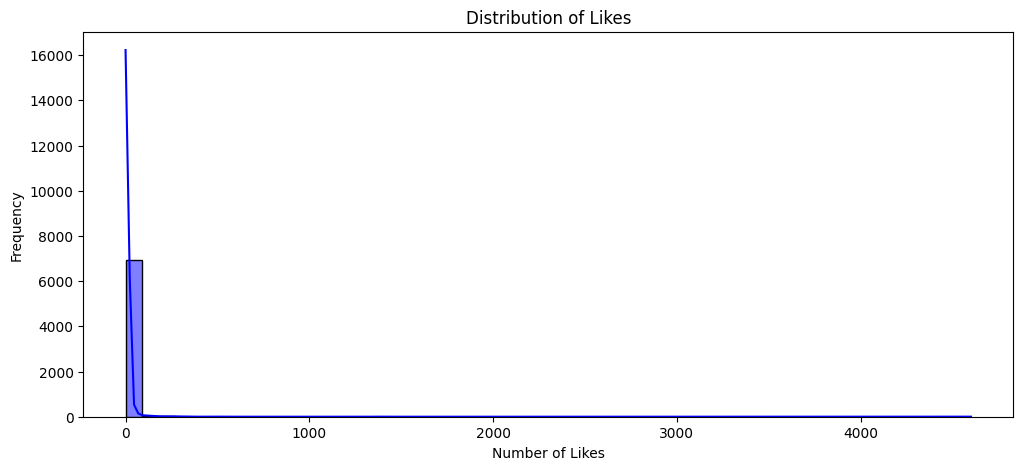

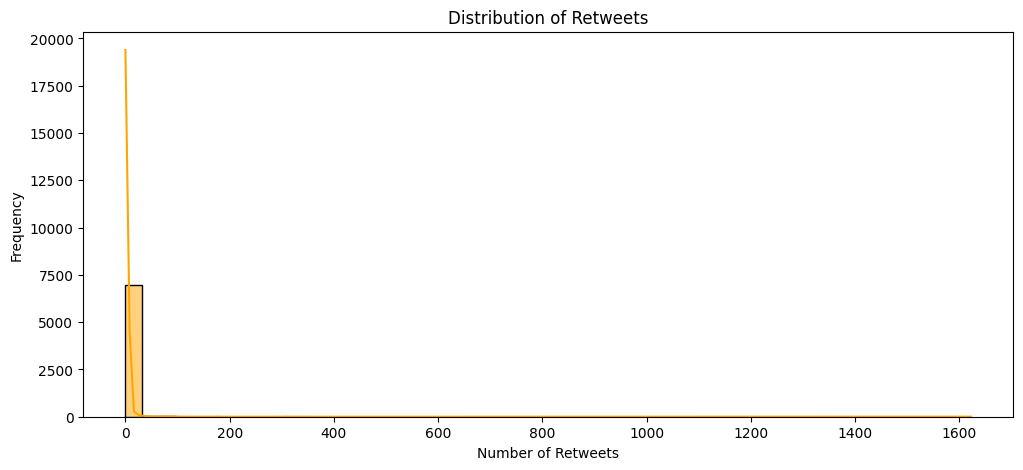

In [7]:
plt.figure(figsize=(12, 5))
sns.histplot(twitter_data['likes'], bins=50, color='blue', kde=True)
plt.title("Distribution of Likes")
plt.xlabel("Number of Likes")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(twitter_data['retweet_count'], bins=50, color='orange', kde=True)
plt.title("Distribution of Retweets")
plt.xlabel("Number of Retweets")
plt.ylabel("Frequency")
plt.show()

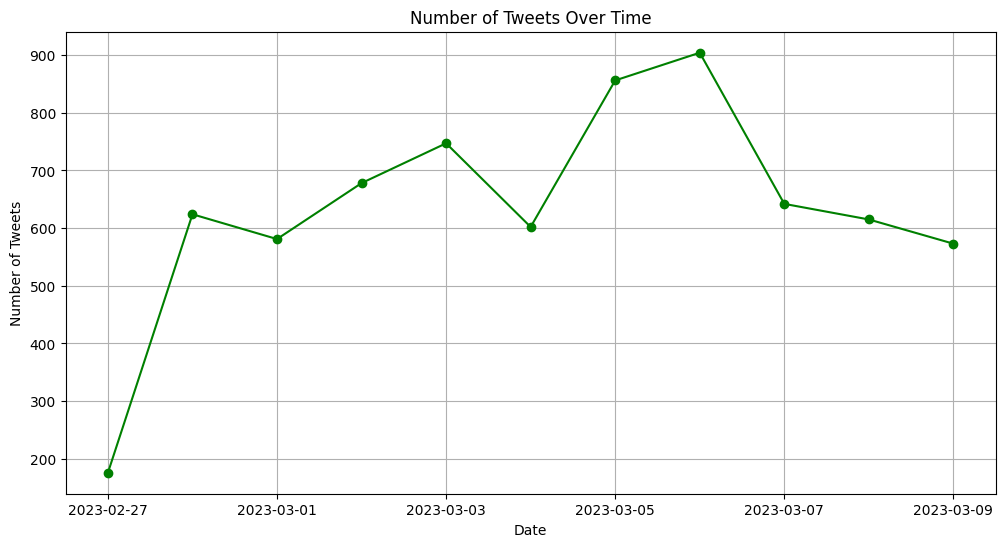

In [8]:
# tweets over the time
twitter_data['time'] = pd.to_datetime(twitter_data['time'])
tweets_per_day = twitter_data.groupby(twitter_data['time'].dt.date).size()

plt.figure(figsize=(12, 6))
tweets_per_day.plot(kind='line', marker='o',color='green')
plt.title('Number of Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()


In [9]:
# Display top 5 tweets by likes
most_liked = twitter_data.nlargest(5, 'likes')[['tweets', 'likes']]
print("Most Liked Tweets:")
print(most_liked)

# Display top 5 tweets by retweets
most_retweeted = twitter_data.nlargest(5, 'retweet_count')[['tweets', 'retweet_count']]
print("\nMost Retweeted Tweets:")
print(most_retweeted)


Most Liked Tweets:
                                                 tweets  likes
3231  Listen to the disappointment in Bill Gates voi...   4601
4503  You know what ended Covid as a threat?\n\nOmic...   3323
680   Pfizer and BioNTech Submit for U.S. Emergency ...   2555
1260  University of Michigan: In a recent paper, res...   1794
2339  Original 7%\nAlpha 8%\nDelta 24%\nOmicron 1: 3...   1600

Most Retweeted Tweets:
                                                 tweets  retweet_count
3231  Listen to the disappointment in Bill Gates voi...           1622
680   Pfizer and BioNTech Submit for U.S. Emergency ...            876
1260  University of Michigan: In a recent paper, res...            592
6100  “About 17% of study participants reported bein...            493
4503  You know what ended Covid as a threat?\n\nOmic...            328


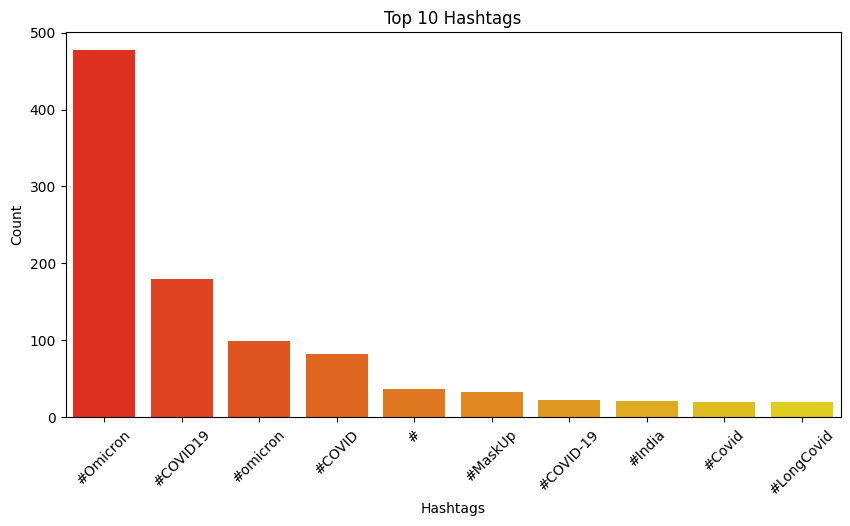

In [10]:
# top keywords and hashtag used in tweets
from collections import Counter
twitter_data['hashtags'] = twitter_data['tweets'].apply(lambda x: [word for word in x.split() if word.startswith('#')])
all_hashtags = [hashtag for hashtags in twitter_data['hashtags'] for hashtag in hashtags]
# Top 10 hashtags
top_hashtags = Counter(all_hashtags).most_common(10)
hashtags, counts = zip(*top_hashtags)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(hashtags), y=list(counts), palette='autumn')
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# data preprocessing

In [11]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer
from bs4 import BeautifulSoup
from textblob import TextBlob

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [12]:
tokenizer=ToktokTokenizer()
stop_words = nltk.corpus.stopwords.words('english')
stemmer = PorterStemmer()
leammatizer = WordNetLemmatizer()

In [13]:
# preprocess the tweets
def remove_html(tweets):
    return re.sub(r'http\S+|www\S+|https\S+', '', tweets, flags=re.MULTILINE)

def remove_tags(tweets):
  return re.sub('@[A-Za-z0-9-]+([A-Z|a-z])','',tweets)

def remove_between_square_brackets(tweets):
    return re.sub('\[[^]]*\]','',tweets)   
def remove_special_characters(tweets,remove_digits=True):
    pattern = r'[^a-zA-Z0-9\s]'
    tweets = re.sub(pattern,'',tweets)
    return tweets

def denoise_tweets(tweets):
    tweets = remove_html(tweets)
    tweets = remove_between_square_brackets(tweets)
    tweets = remove_tags(tweets)
    tweets=remove_special_characters(tweets)
    return tweets  

In [14]:
twitter_data['cleaned_tweets']=twitter_data['tweets'].apply(denoise_tweets)

In [15]:
twitter_data.head()

,tweets,likes,time,retweet_count,hashtags,cleaned_tweets
0,6 big questions about new Omicron-targeting bo...,0,2023-03-09 18:24:06,0,"[#Boosting, #Target, #targeting, #boost]",6 big questions about new Omicrontargeting boo...
1,I'm confused https://t.co/NyfgdYUYAT,0,2023-03-09 18:23:43,0,[],Im confused
2,Long COVID less likely after Omicron than afte...,0,2023-03-09 18:22:43,0,[],Long COVID less likely after Omicron than afte...
3,The finding don't tally with the high numbers ...,0,2023-03-09 18:21:45,0,[],The finding dont tally with the high numbers w...
4,A conference abstract from the European Congre...,1,2023-03-09 18:21:45,1,"[#Omicron, #LongCovid, #SARSCoV2]",A conference abstract from the European Congre...


In [16]:
def simpleStemmer(tweets):
    ps = nltk.porter.PorterStemmer()
    tweets = ' '.join([ps.stem(word) for word in tweets.split()])
    return tweets

twitter_data['stem_tweet'] = twitter_data['cleaned_tweets'].apply(simpleStemmer)
twitter_data.head(2)

,tweets,likes,time,retweet_count,hashtags,cleaned_tweets,stem_tweet
0,6 big questions about new Omicron-targeting bo...,0,2023-03-09 18:24:06,0,"[#Boosting, #Target, #targeting, #boost]",6 big questions about new Omicrontargeting boo...,6 big question about new omicrontarget booster...
1,I'm confused https://t.co/NyfgdYUYAT,0,2023-03-09 18:23:43,0,[],Im confused,im confus


In [17]:
def simpleLemmatization(tweets):
    lemma = nltk.stem.WordNetLemmatizer()
    tweets = ' '.join([lemma.lemmatize(word) for word in tweets.split()])
    return tweets

twitter_data['lemmatize_tweet'] = twitter_data['cleaned_tweets'].apply(simpleLemmatization)
twitter_data.head(2)

,tweets,likes,time,retweet_count,hashtags,cleaned_tweets,stem_tweet,lemmatize_tweet
0,6 big questions about new Omicron-targeting bo...,0,2023-03-09 18:24:06,0,"[#Boosting, #Target, #targeting, #boost]",6 big questions about new Omicrontargeting boo...,6 big question about new omicrontarget booster...,6 big question about new Omicrontargeting boos...
1,I'm confused https://t.co/NyfgdYUYAT,0,2023-03-09 18:23:43,0,[],Im confused,im confus,Im confused


In [18]:
def remove_stopwords(tweets,is_lower_case=False):
    tokens = tokenizer.tokenize(tweets)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stop_words]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

twitter_data['final_tweet'] = twitter_data['cleaned_tweets'].apply(remove_stopwords)
twitter_data.head(2)

,tweets,likes,time,retweet_count,hashtags,cleaned_tweets,stem_tweet,lemmatize_tweet,final_tweet
0,6 big questions about new Omicron-targeting bo...,0,2023-03-09 18:24:06,0,"[#Boosting, #Target, #targeting, #boost]",6 big questions about new Omicrontargeting boo...,6 big question about new omicrontarget booster...,6 big question about new Omicrontargeting boos...,6 big questions new Omicrontargeting boosters ...
1,I'm confused https://t.co/NyfgdYUYAT,0,2023-03-09 18:23:43,0,[],Im confused,im confus,Im confused,Im confused


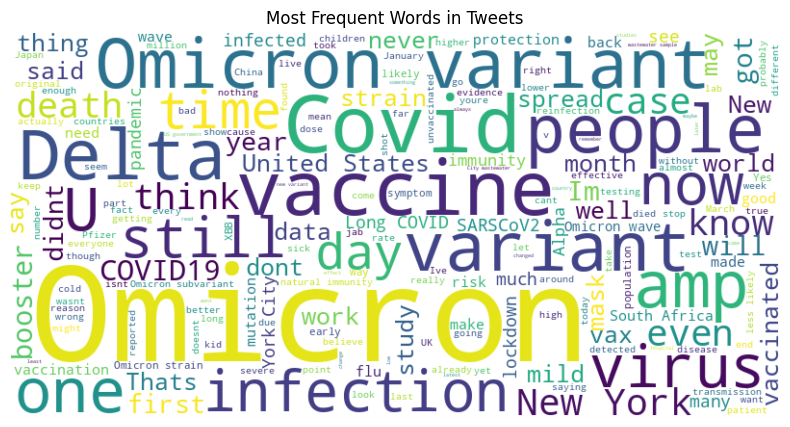

In [19]:
all_words = ' '.join(tweet for tweet in twitter_data['cleaned_tweets'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Tweets')
plt.show()

In [20]:

norm_train_tweet = twitter_data.final_tweet[:4000]
print(norm_train_tweet[0])

norm_test_tweet=twitter_data.final_tweet[4000:]
print(norm_test_tweet[4400])

6 big questions new Omicrontargeting boosters Boosting Target targeting boost
Omicron God variant


In [21]:
# bag of words
cv = CountVectorizer(min_df=1,max_df=0.9,binary=False,ngram_range=(1,3))
cv_train_tweets = cv.fit_transform(norm_train_tweet)
cv_test_tweets = cv.transform(norm_test_tweet)

print('BOW_cv_train:',cv_train_tweets.shape)
print('BOW_cv_test:',cv_test_tweets.shape)

BOW_cv_train: (4000, 108787)
BOW_cv_test: (2998, 108787)


transforming dataset using tfidfvectorizer

In [22]:
tv = TfidfVectorizer(min_df=1,max_df=0.9,use_idf=True,ngram_range=(1,3))
tv_train_tweets = tv.fit_transform(norm_train_tweet)
tv_test_tweets=tv.transform(norm_test_tweet)


print('Tfidf_train:',tv_train_tweets.shape)
print('Tfidf_test:',tv_test_tweets.shape)

Tfidf_train: (4000, 108787)
Tfidf_test: (2998, 108787)


In [23]:
# calculate polarity and subjectivity of tweets
pol = lambda x:TextBlob(x).sentiment.polarity
sub = lambda x:TextBlob(x).sentiment.subjectivity

twitter_data['polarity'] = twitter_data['final_tweet'].apply(pol)
twitter_data['subjectivity'] = twitter_data['final_tweet'].apply(sub)

In [24]:
twitter_data.head()

,tweets,likes,time,retweet_count,hashtags,cleaned_tweets,stem_tweet,lemmatize_tweet,final_tweet,polarity,subjectivity
0,6 big questions about new Omicron-targeting bo...,0,2023-03-09 18:24:06,0,"[#Boosting, #Target, #targeting, #boost]",6 big questions about new Omicrontargeting boo...,6 big question about new omicrontarget booster...,6 big question about new Omicrontargeting boos...,6 big questions new Omicrontargeting boosters ...,0.068182,0.277273
1,I'm confused https://t.co/NyfgdYUYAT,0,2023-03-09 18:23:43,0,[],Im confused,im confus,Im confused,Im confused,-0.400000,0.700000
2,Long COVID less likely after Omicron than afte...,0,2023-03-09 18:22:43,0,[],Long COVID less likely after Omicron than afte...,long covid less like after omicron than after ...,Long COVID less likely after Omicron than afte...,Long COVID less likely Omicron original virus ...,0.039583,0.554167
3,The finding don't tally with the high numbers ...,0,2023-03-09 18:21:45,0,[],The finding dont tally with the high numbers w...,the find dont talli with the high number we se...,The finding dont tally with the high number we...,finding dont tally high numbers see bulletins ...,0.160000,0.540000
4,A conference abstract from the European Congre...,1,2023-03-09 18:21:45,1,"[#Omicron, #LongCovid, #SARSCoV2]",A conference abstract from the European Congre...,a confer abstract from the european congress o...,A conference abstract from the European Congre...,conference abstract European Congress Clinical...,-0.083333,0.033333


In [25]:
twitter_data['Sentiment']= twitter_data['polarity'].apply(lambda x: "Positive" if x>=0.05 else ("Negative" if x<= -0.05 else "Neutral"))

In [26]:
twitter_data.head()

,tweets,likes,time,retweet_count,hashtags,cleaned_tweets,stem_tweet,lemmatize_tweet,final_tweet,polarity,subjectivity,Sentiment
0,6 big questions about new Omicron-targeting bo...,0,2023-03-09 18:24:06,0,"[#Boosting, #Target, #targeting, #boost]",6 big questions about new Omicrontargeting boo...,6 big question about new omicrontarget booster...,6 big question about new Omicrontargeting boos...,6 big questions new Omicrontargeting boosters ...,0.068182,0.277273,Positive
1,I'm confused https://t.co/NyfgdYUYAT,0,2023-03-09 18:23:43,0,[],Im confused,im confus,Im confused,Im confused,-0.400000,0.700000,Negative
2,Long COVID less likely after Omicron than afte...,0,2023-03-09 18:22:43,0,[],Long COVID less likely after Omicron than afte...,long covid less like after omicron than after ...,Long COVID less likely after Omicron than afte...,Long COVID less likely Omicron original virus ...,0.039583,0.554167,Neutral
3,The finding don't tally with the high numbers ...,0,2023-03-09 18:21:45,0,[],The finding dont tally with the high numbers w...,the find dont talli with the high number we se...,The finding dont tally with the high number we...,finding dont tally high numbers see bulletins ...,0.160000,0.540000,Positive
4,A conference abstract from the European Congre...,1,2023-03-09 18:21:45,1,"[#Omicron, #LongCovid, #SARSCoV2]",A conference abstract from the European Congre...,a confer abstract from the european congress o...,A conference abstract from the European Congre...,conference abstract European Congress Clinical...,-0.083333,0.033333,Negative


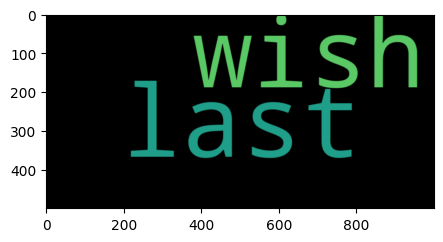

In [27]:
plt.figure(figsize=(5,5))
negative_text=norm_train_tweet[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show()

In [28]:
# splitting the dataset into train and test
train = twitter_data.iloc[:4000]
test = twitter_data.iloc[4000:]

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
lr_bow = lr.fit(cv_train_tweets,train['Sentiment']) #From Bag of Words
print(lr_bow)

lr_tfidf = lr.fit(tv_train_tweets,train['Sentiment']) #TFIDF 
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


In [31]:
# model performance
lr_bow_predict = lr.predict(cv_test_tweets)
print(lr_bow_predict)
lr_tfidf_predict = lr.predict(tv_test_tweets)
print(lr_tfidf_predict)

['Positive' 'Negative' 'Neutral' ... 'Positive' 'Neutral' 'Positive']
['Positive' 'Negative' 'Neutral' ... 'Neutral' 'Neutral' 'Positive']


In [32]:
print(lr_bow_predict.shape)
print(lr_tfidf_predict.shape)

(2998,)
(2998,)


In [33]:
cv_test_tweets[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [34]:
text = twitter_data['tweets'][4000:].tolist()

In [36]:
#Accuracy of the model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr_bow_score = accuracy_score(test['Sentiment'],lr_bow_predict)
print(lr_bow_score)
lr_tfidf_score = accuracy_score(test['Sentiment'],lr_tfidf_predict)
print(lr_tfidf_score)

0.6404269513008672
0.6337558372248165


Accuracy Range: Both values are around 64%, suggesting the model is moderately effective. It performs slightly better than random guessing (e.g., for a balanced dataset, random guessing achieves ~50% accuracy).
Similarity: The scores are close, which could indicate the model generalizes well to unseen data, with no significant overfitting.
2. Inferences:
Model Performance
Adequate but Room for Improvement: Accuracy in the range of 60–70% is often considered a baseline for simpler NLP tasks. There’s scope to improve this by experimenting with hyperparameters, algorithms, or preprocessing techniques.
Dataset Quality
If the dataset is imbalanced or noisy (e.g., mislabeled data or irrelevant features), it may lower the accuracy. Check if one sentiment class (positive/negative/neutral) dominates others, as this could bias the model.
Complexity of Task
Sentiment analysis on tweets is challenging due to:
Short text with limited context.
Use of sarcasm, slangs, or emojis, which can be hard for the model to interpret.
Informality of tweets.
Comparison Between Two Scores
If 0.6404 is Training Accuracy and 0.6338 is Testing Accuracy:
The model shows minimal overfitting, suggesting it generalizes well.
If 0.6404 and 0.6338 are from Different Models/Settings:
Both models perform similarly, indicating that modifications might not be significant enough.


In [37]:
#classificaton report
lr_bow_report=classification_report(test['Sentiment'],lr_bow_predict,target_names=['Negative','Positive','Neutral'])
print(lr_bow_report)
lr_tfidf_report = classification_report(test['Sentiment'],lr_tfidf_predict,target_names=['Negative','Positive','Neutral'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Negative       0.62      0.42      0.51       572
    Positive       0.61      0.62      0.62      1116
     Neutral       0.67      0.75      0.71      1310

    accuracy                           0.64      2998
   macro avg       0.63      0.60      0.61      2998
weighted avg       0.64      0.64      0.63      2998

              precision    recall  f1-score   support

    Negative       0.81      0.26      0.40       572
    Positive       0.68      0.52      0.59      1116
     Neutral       0.60      0.89      0.72      1310

    accuracy                           0.63      2998
   macro avg       0.69      0.56      0.57      2998
weighted avg       0.67      0.63      0.61      2998



In [38]:
cm_bow = confusion_matrix(test['Sentiment'], lr_bow_predict, labels=['Negative', 'Positive', 'Neutral'])
print(cm_bow)
cm_tfidf = confusion_matrix(test['Sentiment'], lr_tfidf_predict, labels=['Negative', 'Positive', 'Neutral'])
print(cm_tfidf)

[[243 167 162]
 [ 49 980 281]
 [ 97 322 697]]
[[ 150  277  145]
 [  10 1168  132]
 [  26  508  582]]


In [39]:
# let use svm for bag of words and tfidf feature
from sklearn import svm
svm = svm.SVC(kernel = 'linear', random_state = 0, C=1.0)
svm_bow = svm.fit(cv_train_tweets,train['Sentiment'])
print(svm_bow)
svm_tfidf = svm.fit(tv_train_tweets,train['Sentiment'])
print(svm_tfidf)

SVC(kernel='linear', random_state=0)
SVC(kernel='linear', random_state=0)


In [40]:
# model building and evaluation
svm_bow_predict = svm.predict(cv_test_tweets)
print(svm_bow_predict)
svm_tfidf_predict = svm.predict(tv_test_tweets)
print(svm_tfidf_predict)

['Positive' 'Negative' 'Neutral' ... 'Positive' 'Positive' 'Positive']
['Positive' 'Negative' 'Neutral' ... 'Neutral' 'Neutral' 'Positive']


In [41]:
svm_bow_score = accuracy_score(test['Sentiment'],svm_bow_predict)
print(svm_bow_score)
svm_tfidf_score = accuracy_score(test['Sentiment'],svm_tfidf_predict)
print(svm_tfidf_score)

0.6704469646430954
0.6711140760507005


In [42]:
svm_bow_report = classification_report(test['Sentiment'],svm_bow_predict,target_names=['Positive','Negative','Neutral'])
print(svm_bow_report)
svm_tfidf_report = classification_report(test['Sentiment'],svm_tfidf_predict,target_names=['Positive','Negative','Neutral'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.59      0.60      0.60       572
    Negative       0.72      0.53      0.61      1116
     Neutral       0.68      0.82      0.74      1310

    accuracy                           0.67      2998
   macro avg       0.66      0.65      0.65      2998
weighted avg       0.67      0.67      0.66      2998

              precision    recall  f1-score   support

    Positive       0.70      0.44      0.54       572
    Negative       0.69      0.56      0.62      1116
     Neutral       0.65      0.87      0.74      1310

    accuracy                           0.67      2998
   macro avg       0.68      0.62      0.64      2998
weighted avg       0.68      0.67      0.66      2998



In [43]:
cm_bow = confusion_matrix(test['Sentiment'],svm_bow_predict,labels=['Neutral','Positive','negative'])
print(cm_bow)
cm_tfidf = confusion_matrix(test['Sentiment'],svm_tfidf_predict,labels=['Neutral','Positive','Negative'])
print(cm_tfidf)

[[ 589  372    0]
 [ 152 1075    0]
 [   0    0    0]]
[[ 624  413   79]
 [ 146 1134   30]
 [ 128  190  254]]


Comparison of the Two Matrices:
in handling neutal matrix 1 completely failed and matrix 2 is improved but still weak.in positive class matrix 1 has higher accuracy but few misclassifications but matrix 2 is slightly better with lower neutral confusion.
in negative class matrix 1 accuracy is decent but little bit biased towards positive and in matrix 2 has similar accuracy but higher confusions with neutral class

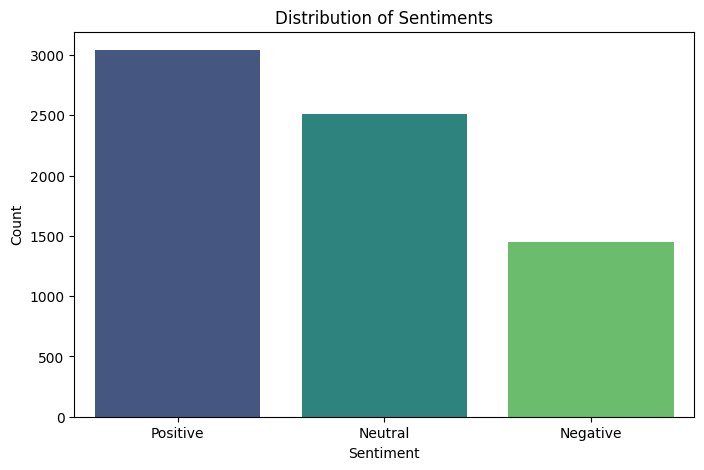

In [45]:
# Bar plot for sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=twitter_data, x='Sentiment', order=twitter_data['Sentiment'].value_counts().index, palette='viridis')
plt.title("Distribution of Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()
